In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import re
import math


In [61]:
import sympy as sp # use for variables in computation

A = np.array([[-1, 0, 0, 1, 0, 0],
               [ 0,-2, 0, 0, 1, 0],
               [ 0, 0,-3, 0, 0, 1],
               [ 0, 0, 1,-4, 0, 0],
               [ 1, 0, 0, 0,-5, 0],
               [ 0, 1, 0, 0, 0,-6]])

A = sp.Matrix(A)

B = np.array([[0,0,0],
               [0,0,0],
               [0,0,0],
               [1,0,0],
               [0,1,0],
               [0,0,1]])

B = sp.Matrix(B)

C = np.array([[1,0,0,0,0,0],
               [0,1,0,0,0,0],
               [0,0,1,0,0,0]])

C = sp.Matrix(C)

I = sp.eye(A.shape[0])

I = sp.Matrix(I)

s = sp.symbols("s")

inner = s*I - A
transFunc = C*(inner**-1)*B

print("Transfer Function G(s)")
sp.pprint(transFunc) #no D matrix

Transfer Function G(s)


Matrix([
[(s**4 + 16*s**3 + 91*s**2 + 216*s + 180)/(s**6 + 21*s**5 + 175*s**4 + 735*s**3 + 1624*s**2 + 1764*s + 719),                                       1/(s**6 + 21*s**5 + 175*s**4 + 735*s**3 + 1624*s**2 + 1764*s + 719),                      (s**2 + 7*s + 10)/(s**6 + 21*s**5 + 175*s**4 + 735*s**3 + 1624*s**2 + 1764*s + 719)],
[                       (s**2 + 9*s + 18)/(s**6 + 21*s**5 + 175*s**4 + 735*s**3 + 1624*s**2 + 1764*s + 719), (s**4 + 14*s**3 + 67*s**2 + 126*s + 72)/(s**6 + 21*s**5 + 175*s**4 + 735*s**3 + 1624*s**2 + 1764*s + 719),                                      1/(s**6 + 21*s**5 + 175*s**4 + 735*s**3 + 1624*s**2 + 1764*s + 719)],
[                                       1/(s**6 + 21*s**5 + 175*s**4 + 735*s**3 + 1624*s**2 + 1764*s + 719),                        (s**2 + 5*s + 4)/(s**6 + 21*s**5 + 175*s**4 + 735*s**3 + 1624*s**2 + 1764*s + 719), (s**4 + 12*s**3 + 49*s**2 + 78*s + 40)/(s**6 + 21*s**5 + 175*s**4 + 735*s**3 + 1624*s**2 + 1764*s + 719)]])

In [62]:
#rows of C informs us of # of visible states (observables states y_i)
vStates = C.shape[0]
#A matrix is partitioned into 2x2 matrix where row 2 are the hidden states and column 2 
A11 = A[:vStates,:vStates]
A12 = A[:vStates,vStates:]
A21 = A[vStates:,:vStates]
A22 = A[vStates:,vStates:]
B1 = B[:vStates,:vStates]
B2 = B[vStates:,:]

I = sp.eye(A22.shape[0])

I = sp.Matrix(I)

s = sp.symbols("s")

inner = (s*I - A22)**-1

W = A11 + A12 * inner * A21

V  = A12 * inner * B2 + B1

#need matrix of W diagonals
D = sp.Matrix(np.diag(np.diag(W)))

leftQ = (s*I - D)**-1
rightQ = (W-D)
Q = leftQ * rightQ
P = leftQ * V

print("Q Matrix")
sp.pprint(Q)
print("P Matrix")
sp.pprint(P)

Q Matrix


Matrix([
[                  0,                   0, 1/((s + 1)*(s + 4))],
[1/((s + 2)*(s + 5)),                   0,                   0],
[                  0, 1/((s + 3)*(s + 6)),                   0]])

P Matrix


Matrix([
[1/((s + 1)*(s + 4)),                   0,                   0],
[                  0, 1/((s + 2)*(s + 5)),                   0],
[                  0,                   0, 1/((s + 3)*(s + 6))]])

In [64]:
###Verify G(s) as a derivation from DSF


inner = (I - Q)**-1
transFuncDSF = sp.simplify(inner * P)

print("Are these functions identical?")
print(transFuncDSF == transFunc)


Are these functions identical?
True


In [43]:
##QUESTION 3##

df = pd.read_csv("gordonGamel.csv")

dfGordon = df[df["batter"] == "Gordon"]
dfGamel = df[df["batter"] == "Gamel"]

dfGordon = dfGordon.reset_index(drop=True)
dfGamel = dfGamel.reset_index(drop=True)

r = 24
c = 25

statesBases = [0,1]

statesNames = []

def genStates():
    
    for firstBase in statesBases:
        
        for secondBase in statesBases:
            
            for thirdBase in statesBases:
                
                for outs in [0,1,2]:
                    
                    statesNames.append(str(firstBase) + str(secondBase) + str(thirdBase) + " " + str(outs))

genStates()
                    
statesNamesR = statesNames
statesNamesC = statesNames

statesNamesC.append("3")

matGordon = np.zeros((r,c))
matGamel = np.zeros((r,c))

def transitionMatrix(df, mat):

    for atBat in range(len(df)):

        currState = df["STATE"][atBat]
        endState = df["NEW.STATE"][atBat]

        rowIndex = statesNamesR.index(currState)
        colIndex = statesNamesC.index(endState)

        mat[rowIndex, colIndex] += 1
        
    for state in range(r):
        
        freq = np.sum(mat[state])
        mat[state] = mat[state] / freq
                       
        
        

transitionMatrix(dfGordon, matGordon)
transitionMatrix(dfGamel, matGamel)


mlbAvgStates = pd.read_csv("MLBAVG.csv")
mlbAvgStates = mlbAvgStates.drop('Unnamed: 0', axis=1)
mlbAvgStates = mlbAvgStates.to_numpy()

C:\Users\Tanner\AppData\Local\Temp\ipykernel_26140\1795452008.py:53: RuntimeWarning: invalid value encountered in true_divide
  mat[state] = mat[state] / freq


In [4]:
def getNullRows(mat):

    nans = np.isnan(mat.T[0])

    nans = [i for i, x in enumerate(nans) if x]
    
    return nans
    
nullRowsGordon = getNullRows(matGordon)
nullRowsGamel = getNullRows(matGamel)

for eachNullRow in nullRowsGordon:
    
    matGordon[eachNullRow] = mlbAvgStates[eachNullRow]
    
for eachNullRow in nullRowsGamel:
    
    matGamel[eachNullRow] = mlbAvgStates[eachNullRow]

Part 3: 

For starters, using the same values for these states on both players will surpress their differences in performance, which is the main goal of our markov chain analysis. The reason why this metric in particular might be an issue, is that assuming both of these players are below average (they both bat ninth), this could boost runs/game past would would be expected. This shouldn't affect their relative position from each other, however. That issue can be resolved by assuming different distributions for each player for those empty states. A few ideas to fill these states could be:

-Average distrubtion across other initial states for that player

-Weighted average distribution, weights dependent on how often that initial state occurred (essentially a vector of outcome states for that player)

-Replicate the distribution of a similar state (i.e. if $011 2$ is an unobserved state, infer that it will be a similar distribution to, say, $001 2$)

In [27]:
runsMatrix = pd.read_csv("runs.csv")
runsMatrix = runsMatrix.drop('Unnamed: 0', axis=1)
runsMatrix = runsMatrix.to_numpy()

def batting_sim(lineup, games=162):
    
    totalRuns = 0
    
    for game in range(games):

        currBatterPos = 0
        currProbMatrix = lineup[currBatterPos]
        
        for inning in range(9):
            
            currState = "000 0"
            
            while currState != "3":

                dist = currProbMatrix[statesNamesR.index(currState)]
                
                result = np.random.choice(np.arange(0, c), p=dist)

                resultingRuns = runsMatrix[statesNamesR.index(currState)][result]
                totalRuns += resultingRuns
                
                currState = statesNamesC[result]
                currBatterPos += 1
                currBatterPos = currBatterPos % 9
                currProbMatrix = lineup[currBatterPos]
                
    return totalRuns / games

def compare(lineup1, lineup2, iter=100):
    
    array1 = []
    array2 = []
    
    for i in range(iter):
        
        array1.append(batting_sim(lineup1))
        array2.append(batting_sim(lineup2))
        
    return array1, array2

In [28]:
mhaniger = pd.read_csv("mhaniger.csv")
mhaniger = mhaniger.drop('Unnamed: 0', axis=1)
mhaniger = mhaniger.to_numpy()
jsegura = pd.read_csv("jsegura.csv")
jsegura = jsegura.drop('Unnamed: 0', axis=1)
jsegura = jsegura.to_numpy()
rcano = pd.read_csv("rcano.csv")
rcano = rcano.drop('Unnamed: 0', axis=1)
rcano = rcano.to_numpy()
ncruz = pd.read_csv("ncruz.csv")
ncruz = ncruz.drop('Unnamed: 0', axis=1)
ncruz = ncruz.to_numpy()
kseager = pd.read_csv("kseager.csv")
kseager = kseager.drop('Unnamed: 0', axis=1)
kseager = kseager.to_numpy()
rhealy = pd.read_csv("rhealy.csv")
rhealy = rhealy.drop('Unnamed: 0', axis=1)
rhealy = rhealy.to_numpy()
dspan = pd.read_csv("dspan.csv")
dspan = dspan.drop('Unnamed: 0', axis=1)
dspan = dspan.to_numpy()
mzunino = pd.read_csv("mzunino.csv")
mzunino = mzunino.drop('Unnamed: 0', axis=1)
mzunino = mzunino.to_numpy()

lineup1 = [mhaniger, jsegura, rcano, ncruz, kseager, rhealy, dspan, mzunino, matGordon]
lineup2 = [mhaniger, jsegura, rcano, ncruz, kseager, rhealy, dspan, mzunino, matGamel]

resultsGordon, resultsGamel = compare(lineup1, lineup2, 100)

Text(0, 0.5, 'Runs per Game')

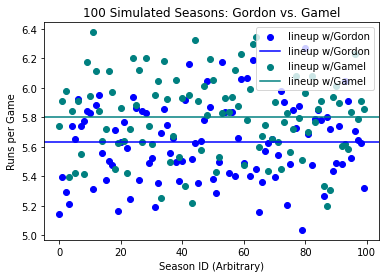

In [29]:
plt.scatter(np.arange(0,100),resultsGordon,label="lineup w/Gordon", color = "blue")
plt.axhline(y = np.mean(resultsGordon), linestyle = '-', color = "blue", label="lineup w/Gordon")
plt.scatter(np.arange(0,100),resultsGamel,label="lineup w/Gamel", color = "teal")
plt.axhline(y = np.mean(resultsGamel), linestyle = '-', color = "teal", label="lineup w/Gamel")
plt.legend()
plt.title("100 Simulated Seasons: Gordon vs. Gamel")
plt.xlabel("Season ID (Arbitrary)")
plt.ylabel("Runs per Game")


In [66]:
!jupyter nbconvert --execute --to html HW08.ipynb

[NbConvertApp] Converting notebook HW08.ipynb to html
[NbConvertApp] Writing 650843 bytes to HW08.html
